FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT ADSP/1. Foundations/Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of df
(rows,columns) = df.shape
print(f"The shape of the data set is {df.shape}.")
print(f"There are {rows} orders, and {columns} characteristics for each order.")

The shape of the data set is (1898, 9).
There are 1898 orders, and 9 characteristics for each order.


#### Observations: There are 1898 orders, and 9 characteristics for each order.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are no null cells. The rating is stored as an object in the data frame. This may imply some orders are not rated, as an integer value.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Find the sum of null values for each column
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data frame.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Find the statistical summary
stat_summary = df.describe()

# Find the minimum, mean, and maximum time for food_preparation_time
min_prep_time = stat_summary.loc['min']['food_preparation_time']
mean_prep_time = stat_summary.loc['mean']['food_preparation_time']
max_prep_time = stat_summary.loc['max']['food_preparation_time']

print(f"For food preparation times of all orders:")
print(f"  the minimum prep time is {min_prep_time} minutes,")
print(f"  the average prep time is {round(mean_prep_time, 1)} minutes,")
print(f"  and the maximum prep time is {max_prep_time} minutes.")

For food preparation times of all orders:
  the minimum prep time is 20.0 minutes,
  the average prep time is 27.4 minutes,
  and the maximum prep time is 35.0 minutes.


#### Observations: For food preparation times of all orders: the minimum prep time is 20.0 minutes, the average prep time is 27.37 minutes, and the maximum prep time is 35.0 minutes.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Find the value counts for each rating.
df['rating'].value_counts()

# Practice with identifying and returning descriptions of the df
print(df['rating'].value_counts())
rating = np.array(df['rating'].value_counts())
not_given = rating[0]
print(f"There are {not_given} unrated orders in the data frame.")

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
There are 736 unrated orders in the data frame.


#### Observations: There are 736 unrated orders in the data frame.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Order ID
print(df['order_id'].head()) # note: the sequence of Order IDs is not sequential

# Check for number of unique order IDs
num_unique = df['order_id'].nunique()
print(f"The number of unique order IDs is {num_unique}.")
if {num_unique} == {rows}:
  print(f"Every order has a unique order ID. So the distribution of Order IDs by index is uniform.")



0    1477147
1    1477685
2    1477070
3    1477334
4    1478249
Name: order_id, dtype: int64
The number of unique order IDs is 1898.
Every order has a unique order ID. So the distribution of Order IDs by index is uniform.


In [ ]:
# Customers

# Find the number of unique costumers
print(f"There are {df['customer_id'].nunique()} unique customer IDs.")

# Create a dataframe that contains the customer IDs with their order counts
df_cust_order_count = df.groupby(['customer_id'])['order_id'].count().sort_values(ascending = False).reset_index(name = 'num_of_orders')
print(df_cust_order_count.head(10))

# Find the average number of orders per customer
avg_order_count = df_cust_order_count['num_of_orders'].mean()
print(f"Customers place {round(avg_order_count, 2)} orders, on average.")

# Create a dataframe that contains the customer IDs with their total sales
df_cust_sales = df.groupby(['customer_id'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index(name = 'sales')
print(df_cust_sales.head(10))

# Find the average sales per customer
avg_sales = df_cust_sales['sales'].mean()
print(f"On average, each costumer orders ${round(avg_sales, 2)}.")

There are 1200 unique customer IDs.
   customer_id  num_of_orders
0        52832             13
1        47440             10
2        83287              9
3       250494              8
4        65009              7
5        82041              7
6       259341              7
7       276192              7
8        60052              6
9       115213              6
Customers place 1.58 orders, on average.
   customer_id   sales
0        52832  225.80
1       250494  183.83
2        47440  158.18
3       276192  146.46
4        83287  139.31
5       259341  130.81
6        97991  122.03
7        82041  120.92
8       115213  115.40
9        60039  109.76
On average, each costumer orders $26.1.


In [ ]:
# Repeat Customers

# Merge the dataframes
df_order_count_sales = pd.merge(df_cust_order_count, df_cust_sales, how= 'inner' , on = 'customer_id')

# Filter the dataframe for repeat customers
df_repeat_cust = df_order_count_sales[df_order_count_sales['num_of_orders'] != 1].copy()

# Find the average number of orders for repeat customers, and the average cost per order
df_repeat_cust.describe()

,customer_id,num_of_orders,sales
count,416.000000,416.000000,416.000000
mean,167470.259615,2.677885,44.147981
std,111144.841503,1.261894,25.466596
min,6987.000000,2.000000,12.610000
25%,77543.000000,2.000000,26.767500
50%,128655.500000,2.000000,38.395000
75%,256608.000000,3.000000,51.922500
max,399729.000000,13.000000,225.800000


In [ ]:
# Restaurant

# Find the number of unique restaurants
print(f"There are {df['restaurant_name'].nunique()} unique restaurants.")

There are 178 unique restaurants.


There are 14 cuisine types
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64


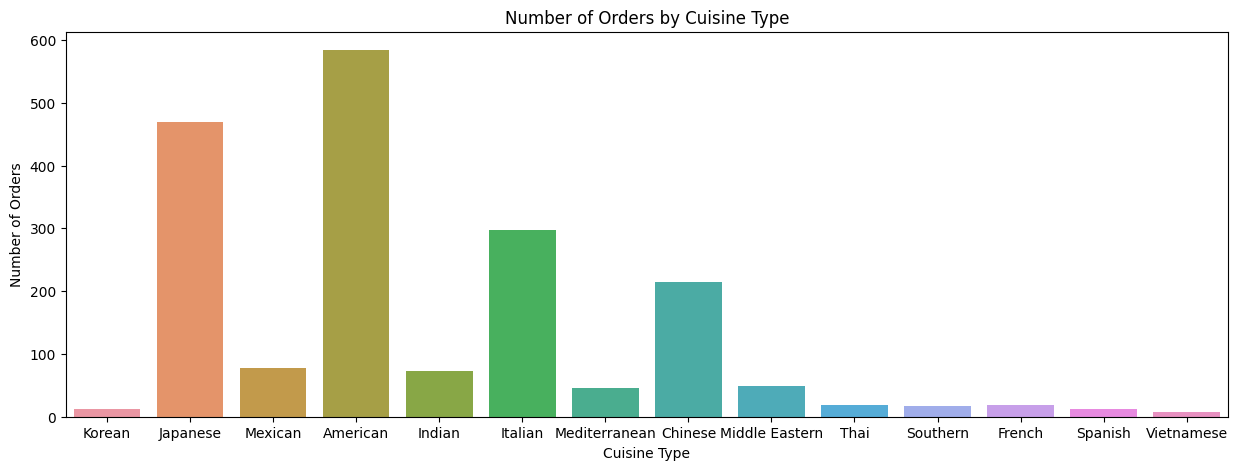

In [ ]:
# Cuisine

# Find the number of unique cuisine types
print(f"There are {df['cuisine_type'].nunique()} cuisine types")

# Find the value counts of cuisine type
print(df['cuisine_type'].value_counts().head())

# Display the number of orders by cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

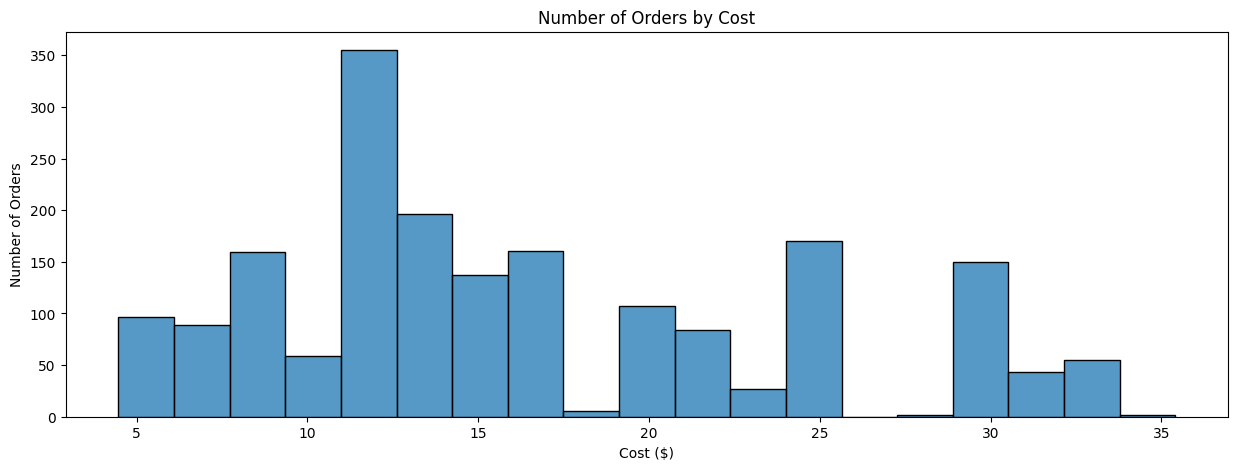

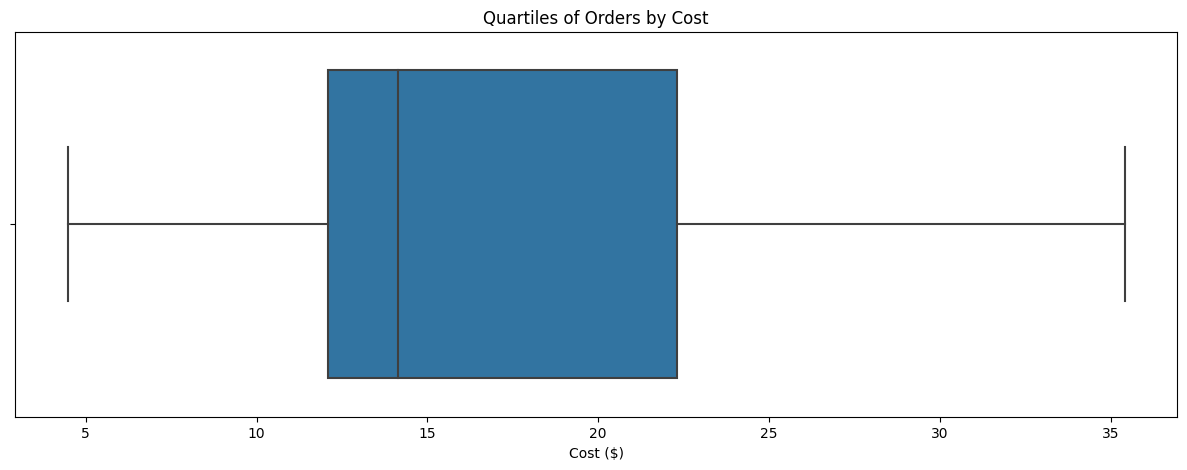

The average cost of an order is $16.5.


In [ ]:
# Cost

# Display the number of orders by cost
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'cost_of_the_order')
plt.title('Number of Orders by Cost')
plt.xlabel('Cost ($)')
plt.ylabel('Number of Orders')
plt.show()

# Display the box plot for number of orders by cost
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'cost_of_the_order')
plt.title('Quartiles of Orders by Cost')
plt.xlabel('Cost ($)')
plt.show()

# Find the average cost
print(f"The average cost of an order is ${round(stat_summary.loc['mean']['cost_of_the_order'], 2)}.")

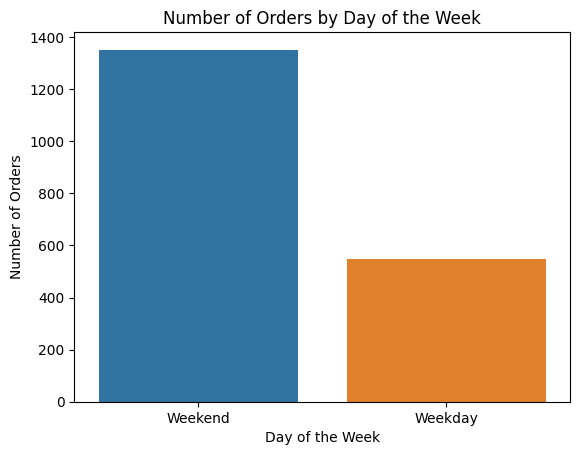

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# Day of the Week

df['day_of_the_week'].nunique()

# Display the number of orders by day of the week
sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# Compare the frequency of weekend and weekday orders
df['day_of_the_week'].value_counts()

There are 736 orders with no rating given, and 1162 rated orders.


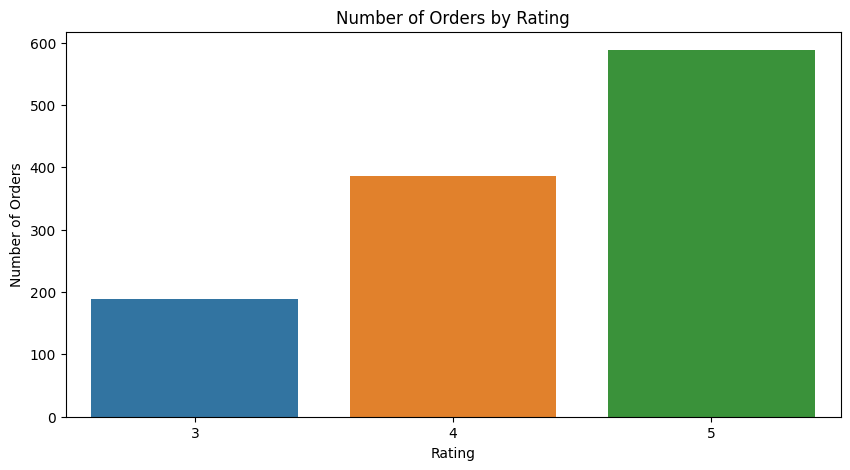

The average rating given is 4.34.


In [ ]:
# Rating

df['rating'].nunique()

# Create a dataframe of the rated orders
df_rated = df[df['rating'] != 'Not given'].copy()

print(f"There are {df['order_id'].nunique() - df_rated['order_id'].nunique()} orders with no rating given, and {df_rated['order_id'].nunique()} rated orders.")

# Convert rating object type to int
df_rated['rating'] = df_rated['rating'].astype('int')

# Display number of orders by rating
plt.figure(figsize = (10,5))
sns.countplot(data = df_rated, x = 'rating')
plt.title('Number of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

# Find the average rating
print(f"The average rating given is {round(df_rated['rating'].mean(), 2)}.")

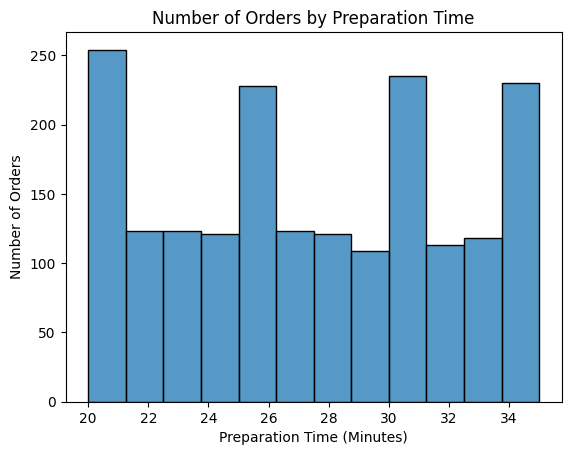

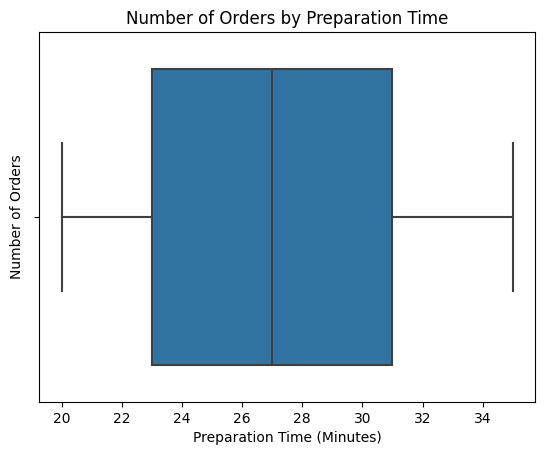

The average prep time is 27.37 minutes.
50% of all orders are prepared between 23.0 and 31.0 minutes.


In [ ]:
# Food Prep Time

# Display histograph for the number of orders by preparation time
sns.histplot(data = df, x = 'food_preparation_time')
plt.title('Number of Orders by Preparation Time')
plt.xlabel('Preparation Time (Minutes)')
plt.ylabel('Number of Orders')
plt.show()

# Display box plot for the number of orders by preparation time
sns.boxplot(data = df, x = 'food_preparation_time')
plt.title('Number of Orders by Preparation Time')
plt.xlabel('Preparation Time (Minutes)')
plt.ylabel('Number of Orders')
plt.show()

# Find the average prep time, and the interquartile range of prep times
avg_prep = df['food_preparation_time'].mean()
print(f"The average prep time is {round(avg_prep, 2)} minutes.")
Q1_prep = df['food_preparation_time'].quantile(0.25)
Q3_prep = df['food_preparation_time'].quantile(0.75)
print(f"50% of all orders are prepared between {round(Q1_prep,2)} and {round(Q3_prep,2)} minutes.")

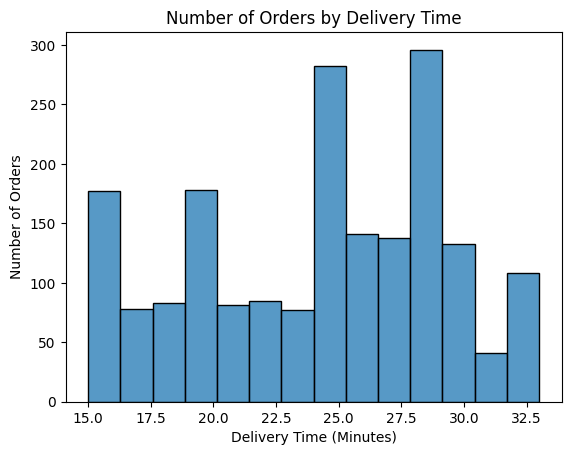

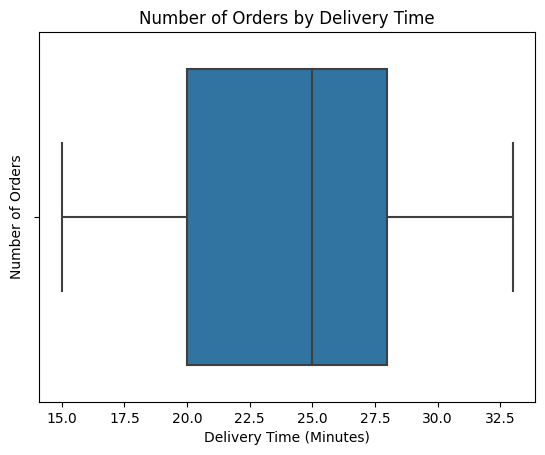

The average delivery time is 24.16 minutes.
50% of all orders have a delivery time between 20.0 and 28.0 minutes.


In [ ]:
# Delivery Time

# Display histograph for the number of orders by delivery time
sns.histplot(data = df, x = 'delivery_time')
plt.title('Number of Orders by Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.show()

# Display box plot for the number of orders by preparation time
sns.boxplot(data = df, x = 'delivery_time')
plt.title('Number of Orders by Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.show()

# Find the average delivery time, and the interquartile range of delivery times
avg_delivery = df['delivery_time'].mean()
print(f"The average delivery time is {round(avg_delivery, 2)} minutes.")
Q1_delivery = df['delivery_time'].quantile(0.25)
Q3_delivery = df['delivery_time'].quantile(0.75)
print(f"50% of all orders have a delivery time between {round(Q1_delivery,2)} and {round(Q3_delivery,2)} minutes.")

1200 customers placed 1898 orders on FoodHub, at an average cost of $16.50.
On average, each customer orders 1.58 orders and generates 26.10 dollars in sales.
An order is 2.47 times as likely to be placed on a weekend than a weekday. The average rating given is 4.34 out of 5.
The average prep time is 27.37 minutes. Most orders are prepared between 23 and 31 minutes.
The average delivery time is 24.16 minutes. Most orders have a delivery time between 20 and 28 minutes.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Find the top 5 restaurants with highest number of orders
top_five_rest = df['restaurant_name'].value_counts()
print(top_five_rest.head())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations: Of the 178 restaurants, Shake Shack accounts for 219 orders out of 1898, or 11.5% of all orders placed.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Find the weekend orders, and count the cuisine type
df_weekend = df[df['day_of_the_week'] == 'Weekend']
print(f"There are {len(df_weekend)} orders placed on the weekend.")

df_weekend['cuisine_type'].value_counts().head()

There are 1351 orders placed on the weekend.


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations: On the weekend, the most popular cuisine types are American, Japanese, Italian, Chinese, and Mexican cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Find the orders that cost over $20
df_over_20 = df[df['cost_of_the_order']>20]
print(f"There are {len(df_over_20)} orders over $20.")

print(f"{round(len(df_over_20)/len(df)*100, 2)}% of orders cost over $20.")

There are 555 orders over $20.
29.24% of orders cost over $20.


#### Observations: 29.24% of orders cost over $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Find the mean delivery time
print(f"The average delivery time is {round(df['delivery_time'].mean(), 2)} minutes.")

The average delivery time is 24.16 minutes.


#### Observations: The average delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find the top 3 most frequent customers.
top_3_cust = df['customer_id'].value_counts().head(3)
print(top_3_cust)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations: The three most frequent customers placed 13, 10, and 9 orders, respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


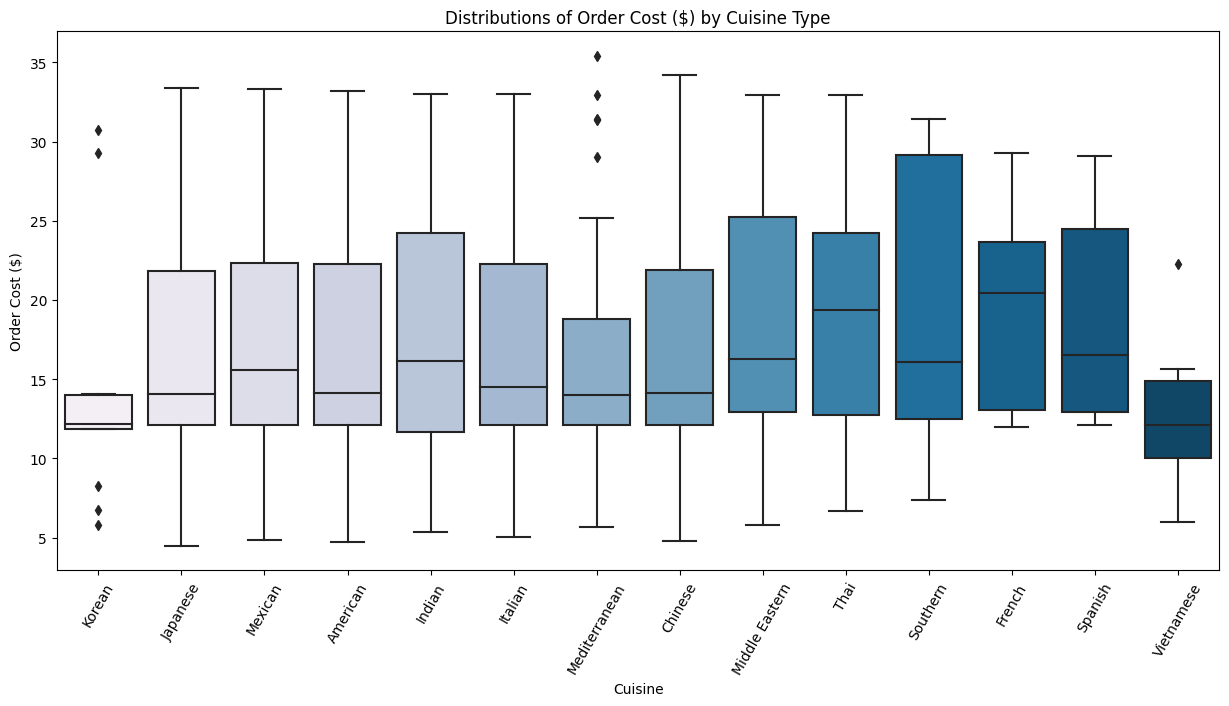

In [ ]:
# Cuisine & Cost
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.title('Distributions of Order Cost ($) by Cuisine Type')
plt.xlabel('Cuisine')
plt.ylabel('Order Cost ($)')
plt.xticks(rotation = 60)
plt.show()

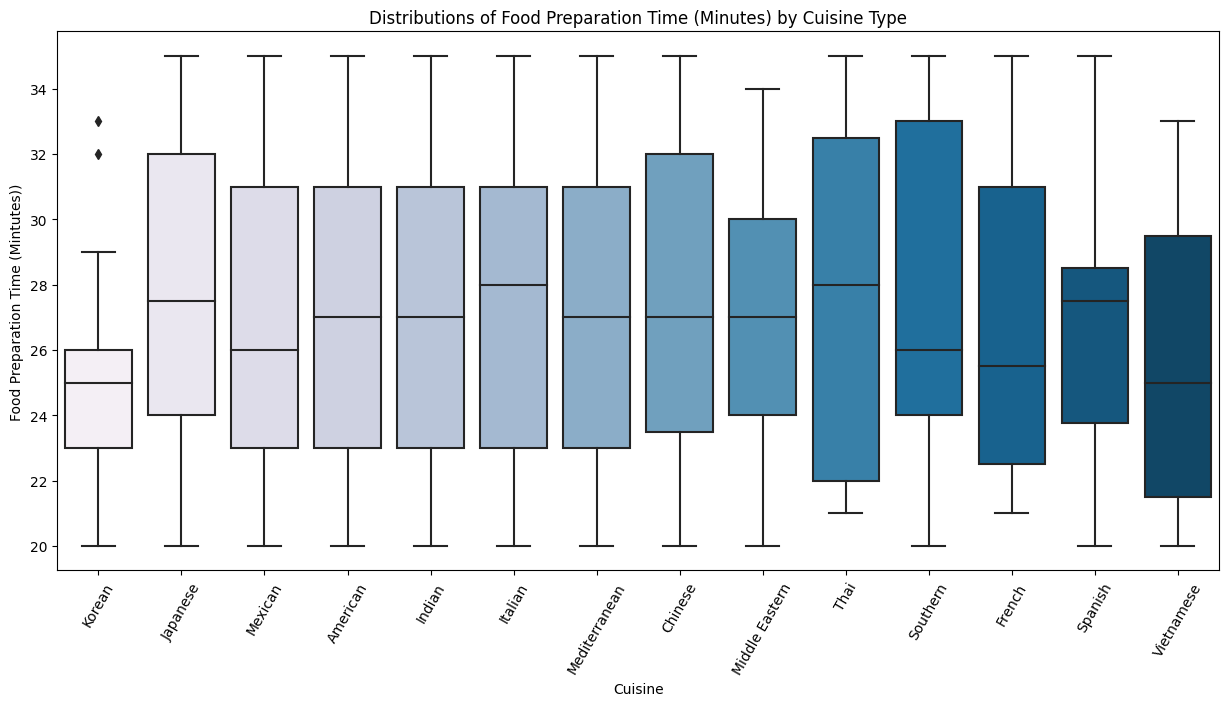

In [ ]:
# Cuisine & Prep Time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.title('Distributions of Food Preparation Time (Minutes) by Cuisine Type')
plt.xlabel('Cuisine')
plt.ylabel('Food Preparation Time (Mintutes))')
plt.xticks(rotation = 60)
plt.show()

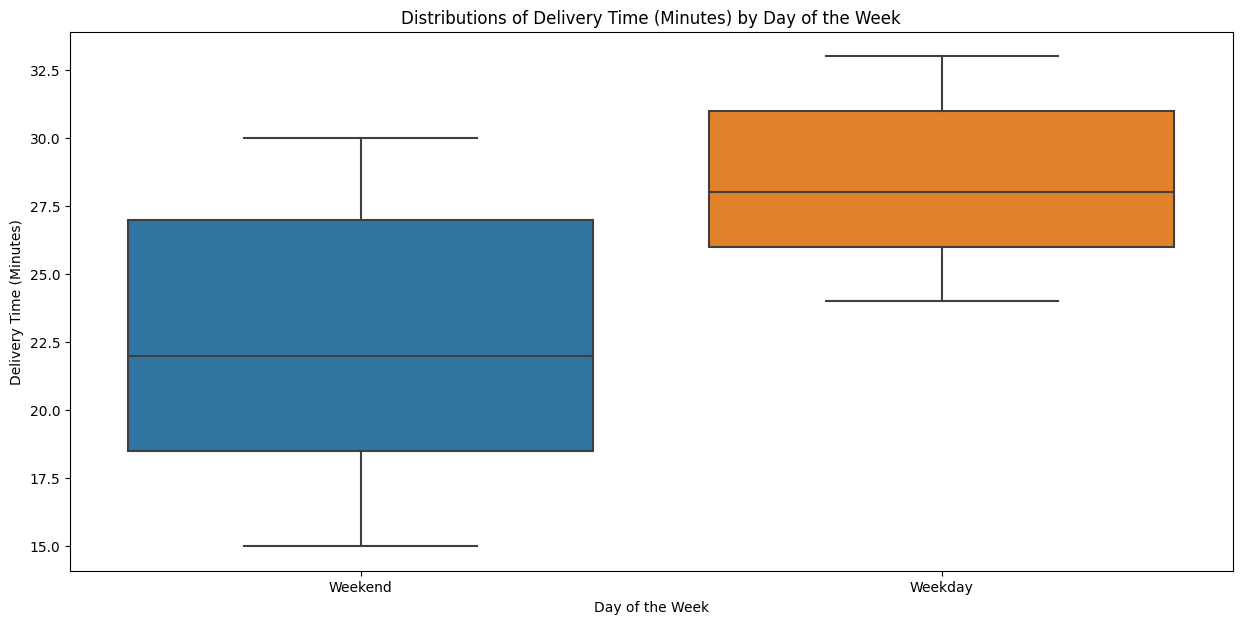

In [ ]:
# Day of the Week & Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.title('Distributions of Delivery Time (Minutes) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

In [ ]:
# Revenue Generated by Restaurant
total_rev = df['cost_of_the_order'].sum()
print(f"The total revenue generated from FoodHub orders is ${total_rev}")
rev_rest = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
print(f"Shake Shack generated the most revenue: ${rev_rest[0]}, or {round(rev_rest[0]/total_rev*100, 2)}% of total FoodHub revenue.")

The total revenue generated from FoodHub orders is $31314.82
Shake Shack generated the most revenue: $3579.53, or 11.43% of total FoodHub revenue.


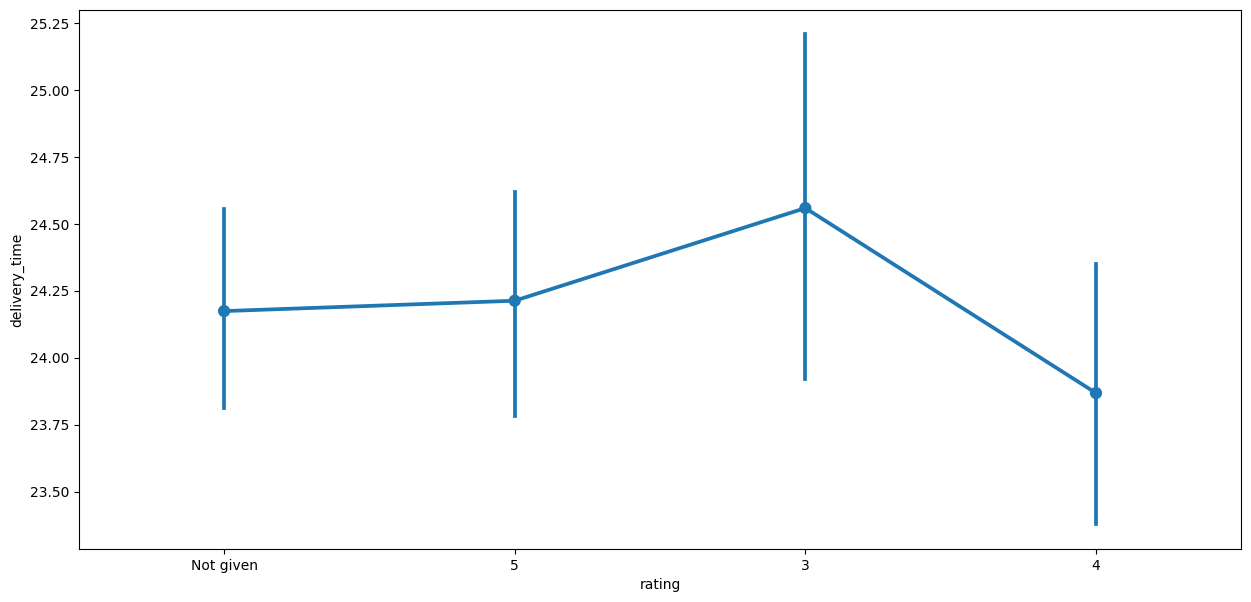

In [ ]:
# Rating & Delivery Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

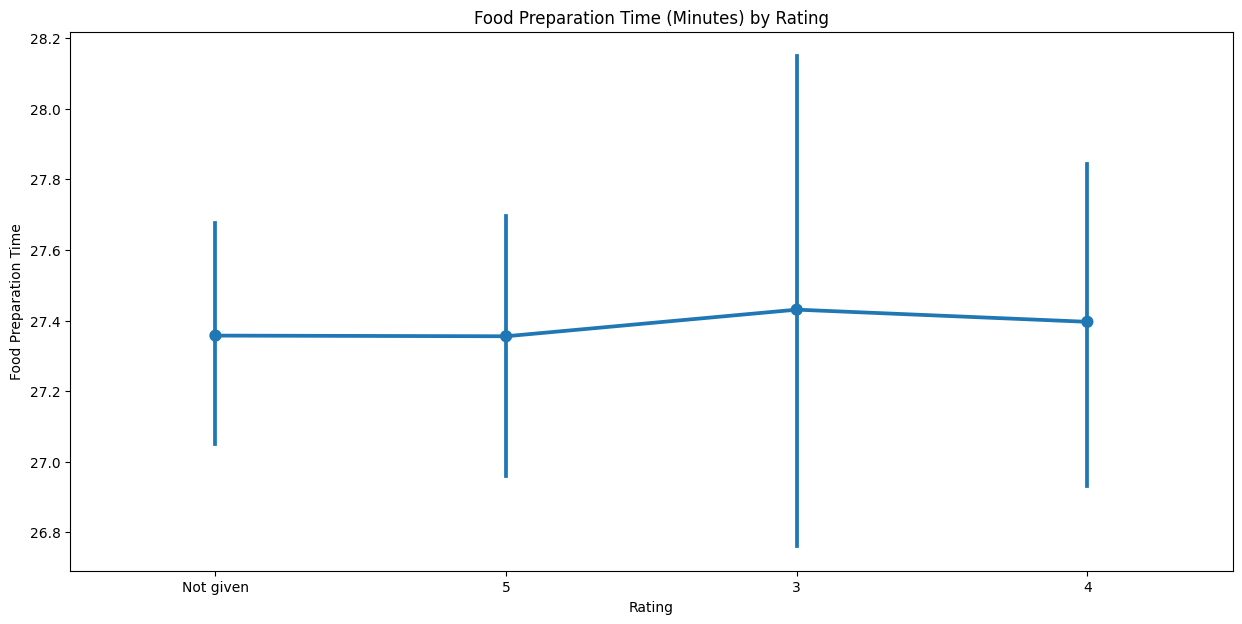

In [ ]:
# Rating & Food Preparation Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.title('Food Preparation Time (Minutes) by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

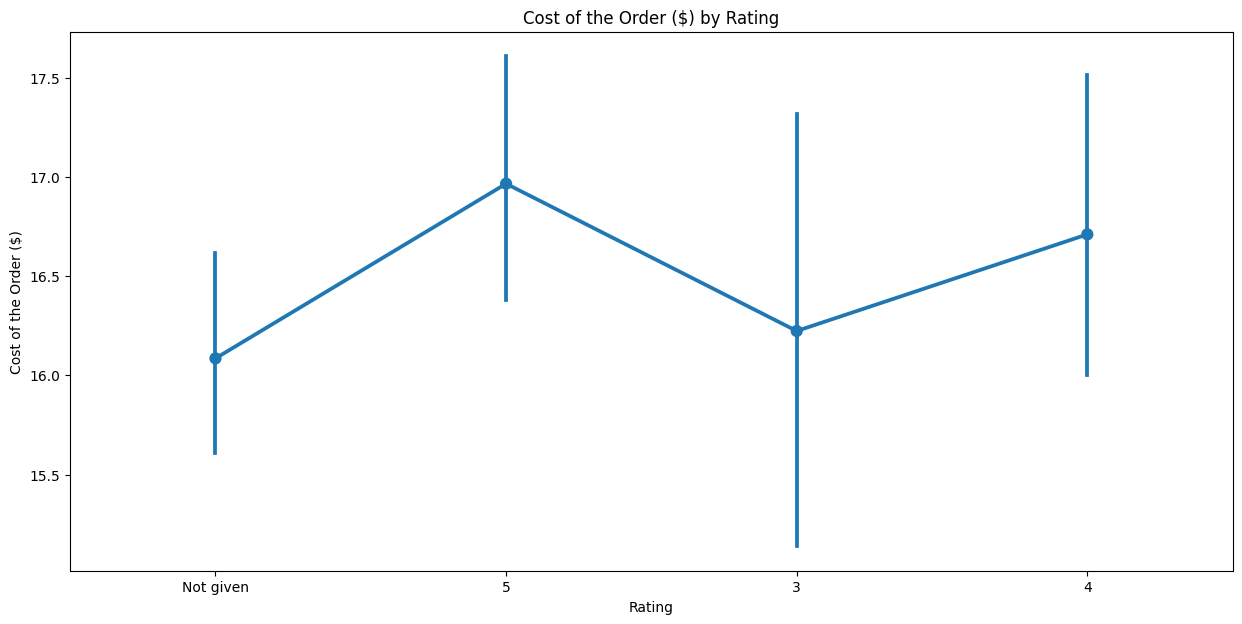

In [ ]:
# Rating & Cost of the Order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.title('Cost of the Order ($) by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order ($)')
plt.show()

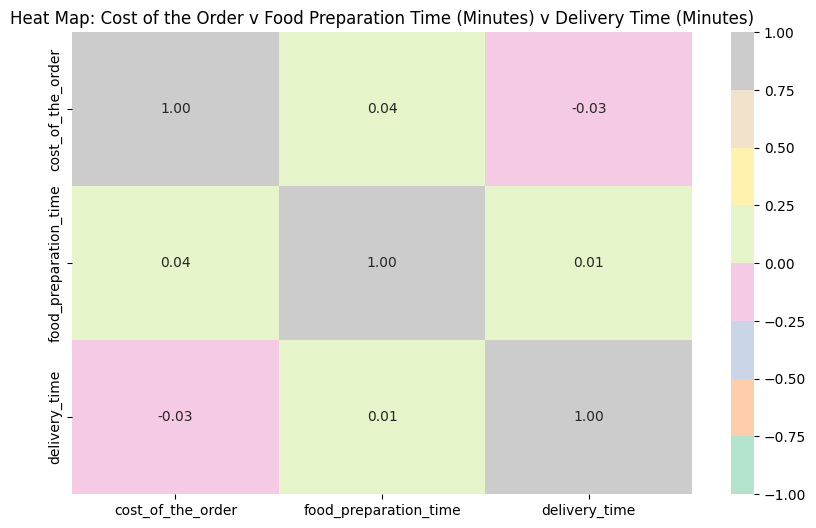

In [ ]:
# Cost of Order & Food Preparation Time & Delivery Time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Pastel2")
plt.title('Heat Map: Cost of the Order v Food Preparation Time (Minutes) v Delivery Time (Minutes)')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index(name = 'num_of_ratings')
df_rating_count.head()

,restaurant_name,num_of_ratings
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names with over 50 orders
rest_names = df_rating_count[df_rating_count['num_of_ratings']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_over_50_ratings = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Create a dataframe that contains the restaurant names with their average rating
df_ratings = df_over_50_ratings.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()
df_ratings.head()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: Every restaurant with over 50 ratings also recevied a rating over 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print(f"The net revenue is around ${round(total_rev, 2)}.")

The net revenue is around $6166.3.


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Get orders that take over 60 minutes
df_time_over_sixty = df[df['total_time']>60]

# Calculate the number of orders with total time over 60 minutes
print('The number orders that take over 60 minutes:', df_time_over_sixty.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_time_over_sixty.shape[0] / df.shape[0]) * 100

print(f"About {round(percentage, 2)}% of orders take more than 60 minutes.")

The number orders that take over 60 minutes: 200
About 10.54% of orders take more than 60 minutes.


#### Observations: About 10.54% of orders take more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations: The mean delivery time on weekdays is around 28 minutes. The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most orders are placed on weekends, and the most popular cuisine type is American
*  The restaurants eligible for the marketing promotion also receive above average ratings
*  The average order cost is below the threshold for the higher fee, 25% for $20 or more
*  The restaurants with the lowest ratings also have the greatest variance in order cost, prep time and delivery time

### Recommendations:

*  Prompt customers to rate their last order for a discount on future orders. This will provide more data regarding the customer experience, and encourage repeat customers.
*  Decrease the threshold for from $20 to $15 for the higher fee to increase revenue.
*  Provide discounted fees to restaurants meeting the conditions of the promo. This will leave the fee unchanged for the most popular restaurants with consistently high ratings.

---